In [13]:
import pandas as pd
import numpy as np
import math
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("../data/tt_data_for_ml.csv")
data = data.dropna()

# y = np.array(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
data = data[["t_travtime", "lat_d", "lon_d", "lat_o", "lon_o", "od_dist"]]
data.head()


,t_travtime,lat_d,lon_d,lat_o,lon_o,od_dist
0,40.0,19.378813,-99.119835,19.436481,-99.160004,7.732718
1,30.0,19.436481,-99.160004,19.378813,-99.119835,7.732718
2,5.0,19.378813,-99.119835,19.376709,-99.117508,1.423484
3,10.0,19.378813,-99.119835,19.376709,-99.117508,1.423484
4,60.0,19.355120,-99.067688,19.378813,-99.119835,6.098191


In [16]:
def euclidean_distance(route1, route2):
    # Similarities between two routes

    o_distance = np.sqrt((route1['lat_o'] - route2["lat_o"])**2 + (route1['lon_o'] - route2["lon_o"])**2)
    d_distance = np.sqrt((route1['lat_d'] - route2["lat_d"])**2 + (route1['lon_d'] - route2["lon_d"])**2)
    
    return o_distance, d_distance

In [17]:
def res_distance(route1):
    center = [19.432777,-99.133217] # lat; long
    resdistance = np.sqrt((route1['lat_o'] - center[0])**2 + (route1['lon_o'] - center[1])**2)
    return resdistance

In [18]:
def work_distance(route1):
    center = [19.432777,-99.133217] # lat; long
    workdistance = np.sqrt((route1['lat_d'] - center[0])**2 + (route1['lon_d'] - center[1])**2)
    return workdistance

In [19]:
# Linear combination

# center = [lat: 19.432777,long: -99.133217.] 

data["res distance"] = data.apply(res_distance, axis = 1)
data["work distance"] = data.apply(work_distance, axis = 1)
# E to the power
# ln Tmij = d ln Distanceij + r ln (Residence CBD Dis)i + w ln (Work CBD Dis)j +vm + umij
# 

In [20]:
def ln(x):
    return math.log(x)

In [21]:
data = data[["t_travtime","od_dist","res distance","work distance"]]

data = data.applymap(ln)

y = data["t_travtime"]
X = data.drop(["t_travtime"], axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}') # Under log
print(f'R² Score: {r2}')

Mean Squared Error: 0.3276599895859389
R² Score: 0.4547888694125751


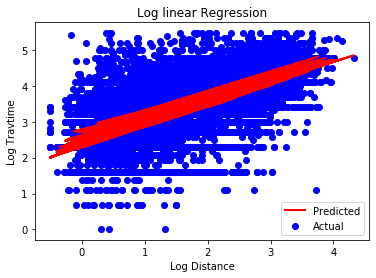

In [23]:

plt.scatter(X_test["od_dist"], y_test, color='blue', label='Actual')
plt.plot(X_test["od_dist"], y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Log linear Regression')
plt.xlabel('Log Distance')
plt.ylabel('Log Travtime')
plt.legend()
plt.show()

In [24]:
# Comparable loss 
y_expactual = np.exp(y_test)
y_exppred = np.exp(y_pred)
# Orginal MSE
MSE_original = np.mean((y_expactual - y_exppred) ** 2)
MSE_original

544.3997887878368

In [25]:
intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: 2.1209226113715927
Coefficients: [ 0.59890719 -0.07167154 -0.05061359]


In [29]:
pred_data = pd.read_csv("../data/tt_pred_for_ml.csv")[:10000]
# pred_data.columns
pred_data = pred_data[['lat_d', 'lon_d', 'lat_o', 'lon_o', 'od_dist']]


In [31]:
pred_data["res distance"] = pred_data.apply(res_distance, axis = 1)
pred_data["work distance"] = pred_data.apply(work_distance, axis = 1)
pred_data = pred_data[["od_dist","res distance","work distance"]]

pred_data = pred_data.applymap(ln)

In [34]:
y_pred_layer = model.predict(pred_data)
y_pred_layer

array([2.97210658, 3.34253843, 3.13077725, ..., 4.54184602, 4.56189143,
       4.75220912])

In [35]:
pred_data['od_dist']

0       0.268798
1       1.054789
2       0.654175
3       0.959705
4       1.314742
          ...   
9995    3.873919
9996    3.746039
9997    3.680426
9998    3.719956
9999    4.080945
Name: od_dist, Length: 10000, dtype: float64

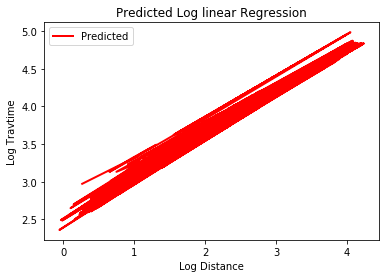

In [36]:
plt.plot(pred_data["od_dist"], y_pred_layer, color='red', linewidth=2, label='Predicted')
plt.title('Predicted Log linear Regression')
plt.xlabel('Log Distance')
plt.ylabel('Log Travtime')
plt.legend()
plt.show()
